In [1]:
!pip install nltk scikit-learn pandas

  Using cached scikit_learn-1.8.0-cp314-cp314-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached pandas-2.3.3-cp314-cp314-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached numpy-2.4.0-cp314-cp314-macosx_14_0_arm64.whl.metadata (6.6 kB)
  Using cached scipy-1.16.3-cp314-cp314-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 167.2 kB/s  0:00:07 eta 0:00:02
Using cached scikit_learn-1.8.0-cp314-cp314-macosx_12_0_arm64.whl (8.1 MB)
Using cached pandas-2.3.3-cp314-cp314-macosx_11_0_arm64.whl (10.8 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached numpy-2.4.0-cp314-cp314-macosx_14_0_arm64.whl (5.2 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using 

In [1]:
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
#tokenizador de palabras y de sentencias
nltk.download('punkt')
nltk.download('punkt_tab')
#palabras de parada
nltk.download('stopwords')
stop_words = set(stopwords.words("spanish"))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pablomerizalde/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/pablomerizalde/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pablomerizalde/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
noticia = "El DANE reveló que la tasa de desempleo nacional se ubicó en 8.2% para octubre de 2025, una disminución frente al mismo periodo del año anterior. Este resultado se vio impulsado por la contratación en sectores de comercio y servicios, aunque la informalidad sigue siendo un reto estructural en las ciudades principales"

len (noticia), noticia

(318,
 'El DANE reveló que la tasa de desempleo nacional se ubicó en 8.2% para octubre de 2025, una disminución frente al mismo periodo del año anterior. Este resultado se vio impulsado por la contratación en sectores de comercio y servicios, aunque la informalidad sigue siendo un reto estructural en las ciudades principales')

In [ ]:
### ¿cómo hago un tokenizador de caracteres?

# Tokenizar

In [3]:
tokenized_sentences = sent_tokenize(noticia)
tokenized_sentences

['El DANE reveló que la tasa de desempleo nacional se ubicó en 8.2% para octubre de 2025, una disminución frente al mismo periodo del año anterior.',
 'Este resultado se vio impulsado por la contratación en sectores de comercio y servicios, aunque la informalidad sigue siendo un reto estructural en las ciudades principales']

In [4]:
tokenized_words = word_tokenize(noticia)
tokenized_words[:10] #se muestran los primeros diez items

['El',
 'DANE',
 'reveló',
 'que',
 'la',
 'tasa',
 'de',
 'desempleo',
 'nacional',
 'se']

# Normalizar

In [5]:
noticia_limpia = noticia

noticia_limpia = noticia_limpia.lower()
noticia_limpia

'el dane reveló que la tasa de desempleo nacional se ubicó en 8.2% para octubre de 2025, una disminución frente al mismo periodo del año anterior. este resultado se vio impulsado por la contratación en sectores de comercio y servicios, aunque la informalidad sigue siendo un reto estructural en las ciudades principales'

In [6]:
#https://docs.python.org/es/3/howto/regex.html
noticia_limpia = re.sub(r'[^\w\s]', ' ', noticia_limpia)
noticia_limpia = re.sub(r'\s+', ' ', noticia_limpia).strip()
noticia_limpia

'el dane reveló que la tasa de desempleo nacional se ubicó en 8 2 para octubre de 2025 una disminución frente al mismo periodo del año anterior este resultado se vio impulsado por la contratación en sectores de comercio y servicios aunque la informalidad sigue siendo un reto estructural en las ciudades principales'

In [7]:
words = noticia_limpia.split()

# Filtrar las stopwords
filtered_words = [word for word in words if word not in stop_words]
filtered_words
# Volver a unir las palabras en una sola cadena
noticia_limpia = (' '.join(filtered_words))
noticia_limpia

'dane reveló tasa desempleo nacional ubicó 8 2 octubre 2025 disminución frente mismo periodo año anterior resultado vio impulsado contratación sectores comercio servicios aunque informalidad sigue siendo reto estructural ciudades principales'

In [8]:
noticias = [
"El DANE reveló que la tasa de desempleo nacional se ubicó en 8.2% para octubre de 2025, una disminución frente al mismo periodo del año anterior. Este resultado se vio impulsado por la contratación en sectores de comercio y servicios, aunque la informalidad sigue siendo un reto estructural en las ciudades principales.",
"La aerolínea Avianca anunció la inmovilización temporal de varios aviones Airbus A320 debido a una directriz global de revisión de motores y actualizaciones de software. La medida ha obligado a cancelar y reprogramar vuelos, afectando a cientos de pasajeros en rutas nacionales e internacionales.",
"La Conmebol confirmó que el estadio Metropolitano Roberto Meléndez de Barranquilla albergará la final única de la Copa Sudamericana en 2026. La noticia fue celebrada por las autoridades locales como una oportunidad para impulsar el turismo y la economía de la región Caribe.",
"La multinacional Kimberly-Clark confirmó el cierre de una de sus plantas en el país, específicamente la línea de producción de Kotex, como parte de una reestructuración global. La compañía aseguró que mantendrá su presencia comercial en Colombia, pero el cierre implica despidos y ajustes operativos significativos.",
"La Fiscalía General citó a audiencia de imputación de cargos al exministro Álvaro Leyva Durán por el delito de prevaricato. El caso está relacionado con las presuntas irregularidades en la declaratoria de desierta de la licitación de pasaportes y el conflicto legal con la firma Thomas Greg & Sons.",
"El equipo colombiano goleó a Tailandia y aseguró su pase a los cuartos de final del primer Mundial Femenino de Futsal de la FIFA. Las jugadoras colombianas se consolidan como favoritas y se preparan para un difícil encuentro contra Argentina en la siguiente fase.",
"Una explosión contra un vehículo de carga en el tramo entre Cauca y Nariño de la vía Panamericana dejó una persona fallecida y el cierre total de la carretera. Las autoridades atribuyen el hecho a disidencias que operan en la zona, afectando gravemente la movilidad hacia el sur del país.",
"Los abogados de Santiago Uribe Vélez radicaron oficialmente la impugnación ante el Tribunal Superior de Antioquia contra la sentencia que lo condenó por concierto para delinquir y homicidio agravado en el caso de los '12 Apóstoles'. Buscan que la Corte Suprema revise y revoque el fallo.",
"El gobierno español aceptó la invitación de Colombia para actuar como país acompañante y facilitador en la mesa de diálogos socio-jurídicos con el Clan del Golfo. Este respaldo internacional busca dar garantías y agilizar el proceso de sometimiento a la justicia de este grupo armado.",
"Un tribunal administrativo ordenó a la Concesión Vial de Cartagena devolver al Distrito más de 113 mil millones de pesos. El fallo determina que se siguieron cobrando peajes después de que la Tasa Interna de Retorno del proyecto ya se había cumplido en octubre de 2020.",
"La Procuraduría suspendió provisionalmente al General Juan Miguel Huertas y al director de inteligencia del DNI. Se investiga si entregaron información sensible o colaboraron con estructuras de las disidencias de las FARC en el sur del país, lo que ha generado una purga interna en la inteligencia estatal.",
"A través de una nueva circular de la Cancillería y la Registraduría, se formalizó la opción de marcar el género como 'T' (Trans) o 'NB' (No Binario) en cédulas y pasaportes. La medida busca garantizar el derecho a la identidad de género de la población diversa en Colombia.",
"En un partido clave de la Liga BetPlay II-2025, América de Cali venció al Independiente Medellín, consolidándose como líder de su grupo. El resultado acerca al equipo escarlata a la gran final del fútbol colombiano, mientras el DIM complica sus posibilidades de clasificación.",
"El instituto de hidrología advirtió sobre un incremento de las precipitaciones en las regiones Andina y Pacífica para cerrar noviembre. Se mantienen alertas rojas por deslizamientos en varios municipios de Antioquia, Chocó y el Eje Cafetero debido a la saturación de los suelos.",
"Tropas del Ejército lograron la liberación de nueve mineros que habían sido secuestrados hace más de un mes en zona rural del Huila. Las víctimas se encontraban en condiciones infrahumanas y eran retenidas por un grupo armado que exigía dinero por su liberación.",
]

In [9]:
#instanciamos el vectorizador
tfidf_vectorizer = TfidfVectorizer(stop_words=list(stop_words))

tfidf_matrix = tfidf_vectorizer.fit_transform(noticias)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [10]:
tfidf_matrix[1].toarray().shape, feature_names.shape

((1, 338), (338,))

In [11]:

print("\n Los terminos más importantes por noticia:")
for i, doc in enumerate(noticias):
    # Get TF-IDF scores for the current document
    document_tfidf_scores = tfidf_matrix[i].toarray().flatten()

    # Create a dictionary of word and its TF-IDF score for the document
    scores = {word: score for word, score in zip(feature_names, document_tfidf_scores) if score > 0}

    # Sort the scores in descending order
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

    print(f"\n--- Articulo {i + 1} ---")
    print(f"resumen: {doc}...")

    for word, score in sorted_scores[:3]:
        print(f"  {word}: {score:.4f}")


 Los terminos más importantes por noticia:

--- Articulo 1 ---
resumen: El DANE reveló que la tasa de desempleo nacional se ubicó en 8.2% para octubre de 2025, una disminución frente al mismo periodo del año anterior. Este resultado se vio impulsado por la contratación en sectores de comercio y servicios, aunque la informalidad sigue siendo un reto estructural en las ciudades principales....
  anterior: 0.1889
  aunque: 0.1889
  año: 0.1889

--- Articulo 2 ---
resumen: La aerolínea Avianca anunció la inmovilización temporal de varios aviones Airbus A320 debido a una directriz global de revisión de motores y actualizaciones de software. La medida ha obligado a cancelar y reprogramar vuelos, afectando a cientos de pasajeros en rutas nacionales e internacionales....
  a320: 0.1970
  actualizaciones: 0.1970
  aerolínea: 0.1970

--- Articulo 3 ---
resumen: La Conmebol confirmó que el estadio Metropolitano Roberto Meléndez de Barranquilla albergará la final única de la Copa Sudamericana en 

In [12]:
!pip install wordcloud matplotlib

  Using cached matplotlib-3.10.8-cp314-cp314-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached pillow-12.1.0-cp314-cp314-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-macosx_10_15_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
Using cached matplotlib-3.10.8-cp314-cp314-macosx_11_0_arm64.whl (8.2 MB)
Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp314-cp314-macosx_10_15_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-12.1.0-cp314-cp314-macosx_11_0_arm64.whl (4.7 MB)
Using cached pyparsing-3.3.1

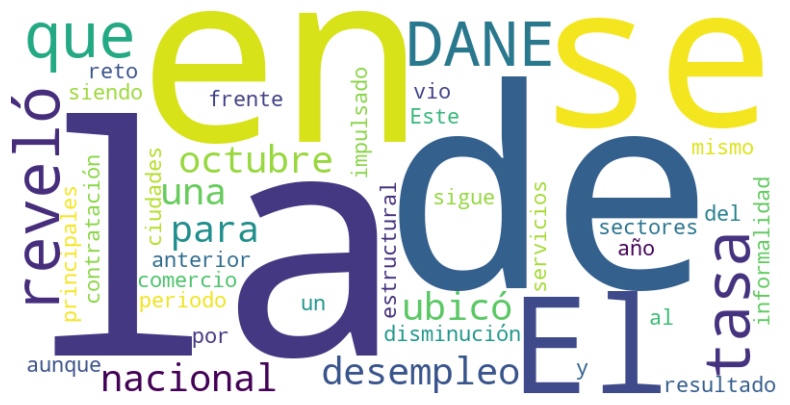

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear la nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"  # esquema de colores
).generate(noticia)

# Mostrar la nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

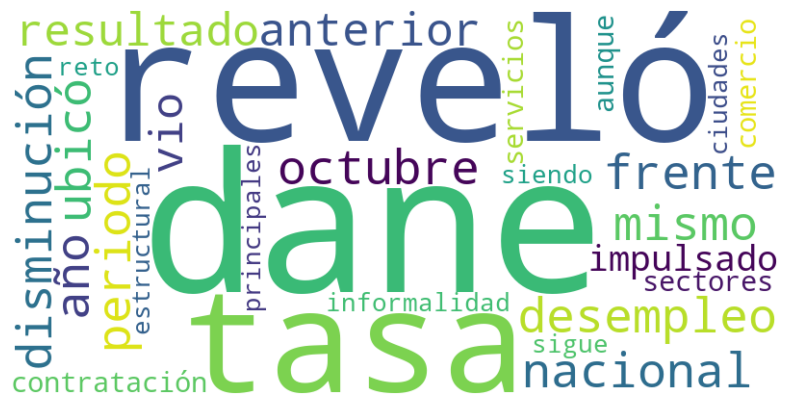

In [15]:
# Crear la nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"  # esquema de colores
).generate(noticia_limpia)

# Mostrar la nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()